## STEP-1: Import all required packages

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## STEP-2: Load the dataset

In [227]:
# Load the dataset. 
# df = pd.read_csv("Loan/loan.csv")

# Got an warning DtypeWarning: Columns (47) have mixed types. so reload the dataseet with low_memory=False
df = pd.read_csv("Loan/loan.csv", low_memory=False)

## STEP-3: Data cleaning and preprocessing

In [229]:
# Drop columns where all values are NULL
df = df.dropna(axis=1, how='all')

# Convert int_rate values from string to numeric (float)
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)

# Check loan status and add a new column(boolean value 0 or 1) against Charged off customers
# This column will be used to compare against other variables. Those with loan status as 'charged off' are set 1 otherwise 0
df['is_default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

## Univariate analysis

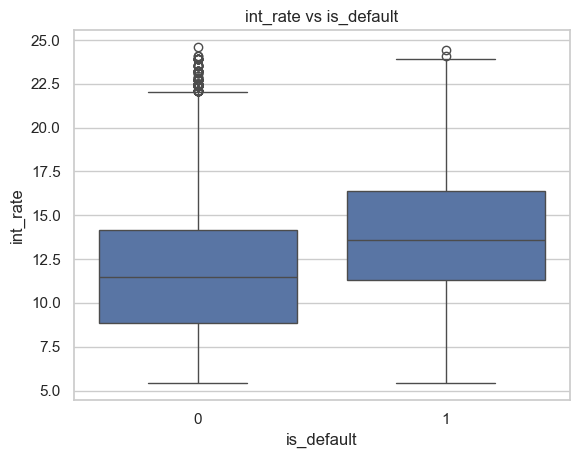

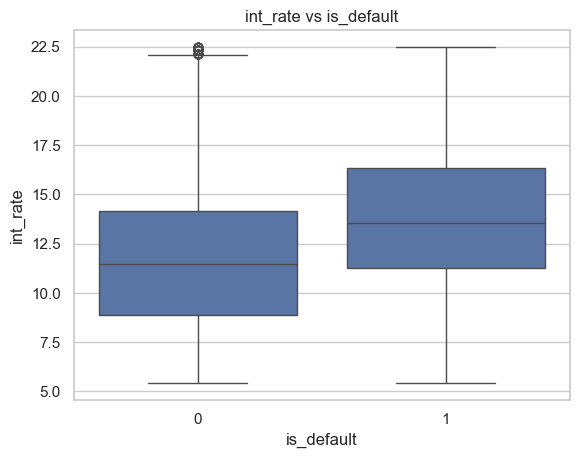

In [253]:
# Let's understand how interest rates vary for defaulters and non defaulters using box plot
sns.boxplot(data=df, x='is_default', y='int_rate')
plt.title('int_rate vs is_default')
plt.show()

# From the box plot it's evident there are some outliers for the non defaulters. Let's remove those using IQR method.
Q1 = df['int_rate'].quantile(0.25)  # 25th percentile
Q3 = df['int_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['int_rate'] >= lower_bound) & (df['int_rate'] <= upper_bound)]

sns.boxplot(data=df_filtered, x='is_default', y='int_rate')
plt.title('int_rate vs is_default')
plt.show()

# From the box plot it is evident that the non defaulters have a higher median interest rate.

In [289]:
# Now let's understand how annual_inc relate wrt defaulter status by plotting a histogram
df['annual_inc'].describe()
# sns.boxplot(data=df, x='is_default', y='annual_inc')
# plt.title('annual_inc vs is_default')
# plt.show()

# # From the box plot it's evident there are some outliers for the non defaulters. Let's remove those using IQR method.
# Q1 = df['annual_inc'].quantile(0.25)  # 25th percentile
# Q3 = df['annual_inc'].quantile(0.75)  # 75th percentile
# IQR = Q3 - Q1  # Interquartile range
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_filtered1 = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]

# sns.boxplot(data=df_filtered1, x='is_default', y='int_rate')
# plt.title('annual_inc vs is_default')
# plt.show()

# plt.figure(figsize=(10,6))
# sns.histplot(df[df['is_default'] == 0]['annual_inc'], color='blue', kde=True, label='Non-Defaulters', stat='density')
# sns.histplot(df[df['is_default'] == 1]['annual_inc'], color='red', kde=True, label='Defaulters', stat='density')
# plt.legend()
# plt.title('Income Distribution for Defaulters vs Non-Defaulters')
# plt.show()

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Boxplot to compare income distribution between defaulters and non-defaulters
# sns.boxplot(x='is_default', y='annual_inc', data=df)
# plt.title('Annual Income vs Defaulter Status')
# plt.show()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [297]:
# Verification status against defaulter status
df['verification_status'].value_counts()
pd.crosstab(df['verification_status'], df['is_default'], normalize='columns')

#From the result we can conclude that higher percentage of verified customers are defaulters where as 
# higher percentage of not verfied customers are non defaulters

is_default,0,1
verification_status,,
Not Verified,0.433529,0.380665
Source Verified,0.250895,0.254843
Verified,0.315576,0.364493


           total_loans  total_defaults  default_rate
sub_grade                                           
A1                1139              30      0.026339
A2                1508              74      0.049072
A3                1810             103      0.056906
A4                2886             178      0.061677
A5                2742             217      0.079139
B1                1830             171      0.093443
B2                2057             228      0.110841
B3                2917             341      0.116901
B4                2512             329      0.130971
B5                2704             356      0.131657
C1                2136             336      0.157303
C2                2011             321      0.159622
C3                1529             270      0.176586
C4                1236             212      0.171521
C5                1186             208      0.175379
D1                 931             167      0.179377
D2                1348             271      0.

C:\Users\debas\AppData\Local\Temp\ipykernel_13516\1975151882.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subgrade_analysis.index, y=subgrade_analysis['default_rate'], palette='coolwarm')


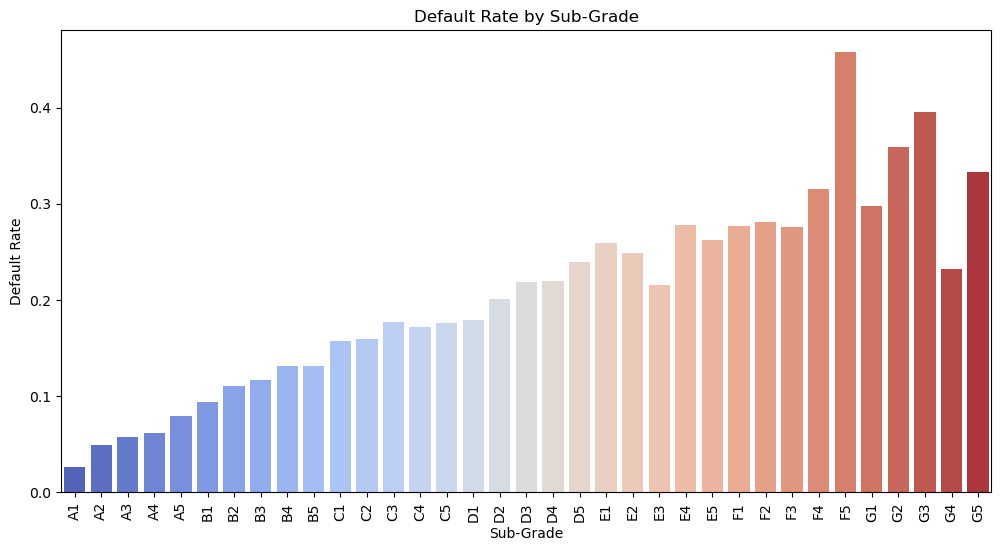

In [141]:
df['sub_grade'].value_counts()
subgrade_analysis = df.groupby('sub_grade').agg(
    total_loans=('loan_status', 'count'),
    total_defaults=('loan_status', lambda x: (x == 'Charged Off').sum())
)
subgrade_analysis['default_rate'] = subgrade_analysis['total_defaults'] / subgrade_analysis['total_loans']

print(subgrade_analysis)

# Chi-squared test for significance
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['sub_grade'], df['loan_status'] == 'Charged Off')

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test p-value: {p}")

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=subgrade_analysis.index, y=subgrade_analysis['default_rate'], palette='coolwarm')
plt.title('Default Rate by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Default Rate')
plt.xticks(rotation=90)
plt.show()

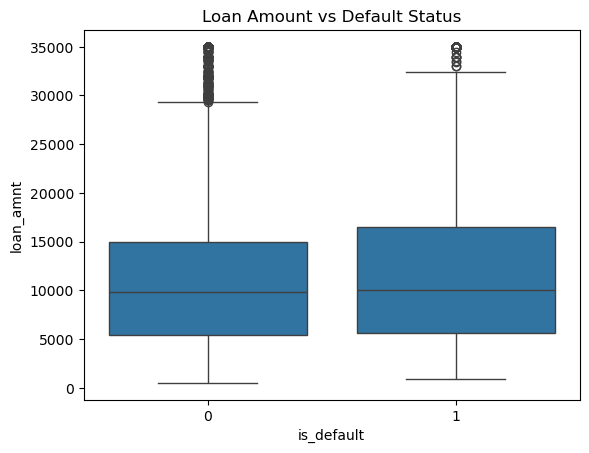

In [135]:
# Exmine distribution of loan_amt for defaulters and non defaulter.
sns.boxplot(data=df, x='is_default', y='loan_amnt')
plt.title('Loan Amount vs Default Status')
plt.show()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64
int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64


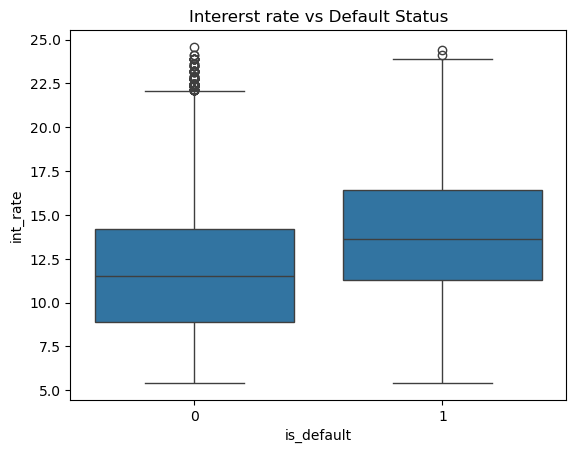

In [57]:
# As from above visualization we couldn't conclude loan amount is driving the defaulters
# leet's compare another variable mayb interest rate.

# sns.boxplot(data=df, x='is_default', y='int_rate')
# plt.title('Intererst rate vs Default Status')
# plt.show()

# Check Data Type of int_rate:
print(df['int_rate'].value_counts())

# Replace the % with '' and convert to float
# df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
print(df['int_rate'].value_counts())

sns.boxplot(data=df, x='is_default', y='int_rate')
plt.title('Intererst rate vs Default Status')
plt.show()

#As analysed from the box plot defaulter seems to have higher interest rate than non defaulters.
# Now try to analyze interest rate with other values like loan amount we can do multivariate analysis.



In [182]:
# Check if higher delinquencies correlate with default rates. For instance:
df.groupby('loan_status')['delinq_2yrs'].mean()

loan_status
Charged Off    0.170606
Current        0.141228
Fully Paid     0.142580
Name: delinq_2yrs, dtype: float64

In [184]:
df.groupby('loan_status')['collections_12_mths_ex_med'].mean()


loan_status
Charged Off    0.0
Current        0.0
Fully Paid     0.0
Name: collections_12_mths_ex_med, dtype: float64

In [295]:
df['verification_status'].value_counts()
pd.crosstab(df['verification_status'], df['is_default'], normalize='columns')

is_default,0,1
verification_status,,
Not Verified,0.433529,0.380665
Source Verified,0.250895,0.254843
Verified,0.315576,0.364493
